In [1]:
# 📌 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

import joblib
import warnings
warnings.filterwarnings("ignore")


In [2]:
# 📌 2. Generate dummy e-commerce transaction data
np.random.seed(42)

n_samples = 2000
data = pd.DataFrame({
    'transaction_amount': np.random.uniform(1, 1000, n_samples),
    'transaction_type': np.random.choice(['purchase', 'refund', 'transfer'], n_samples),
    'country': np.random.choice(['US', 'UK', 'NG', 'IN', 'CN'], n_samples),
    'time_hour': np.random.randint(0, 24, n_samples),
    'is_fraud': np.random.choice([0, 1], n_samples, p=[0.95, 0.05])
})

# Encode categorical variables
data = pd.get_dummies(data, columns=['transaction_type', 'country'], drop_first=True)
data.head()


,transaction_amount,time_hour,is_fraud,transaction_type_refund,transaction_type_transfer,country_IN,country_NG,country_UK,country_US
0,375.165579,20,0,False,True,False,True,False,False
1,950.763592,15,0,False,True,True,False,False,False
2,732.261948,3,0,False,True,False,False,False,False
3,599.059826,7,0,True,False,False,True,False,False
4,156.862622,1,0,True,False,True,False,False,False


In [3]:
# 📌 3. Train-test split and model training
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'fraud_model.pkl')


['fraud_model.pkl']

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       481
           1       0.00      0.00      0.00        19

    accuracy                           0.96       500
   macro avg       0.48      0.50      0.49       500
weighted avg       0.93      0.96      0.94       500


Confusion Matrix:


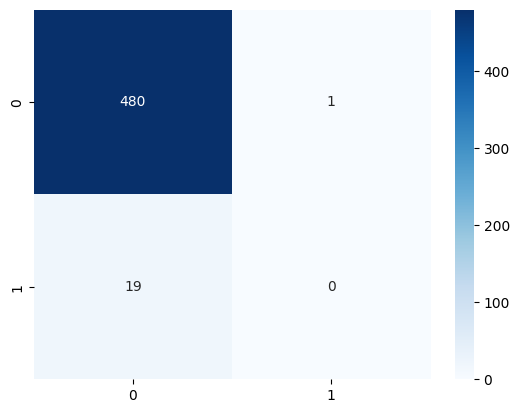


ROC AUC Score: 0.5118721960827224


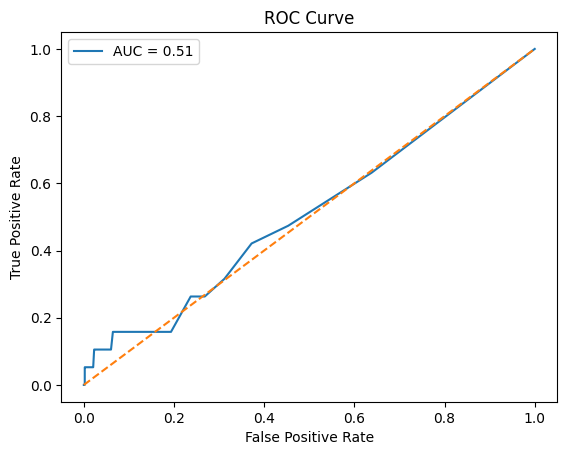

In [4]:
# 📌 4. Evaluate the model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


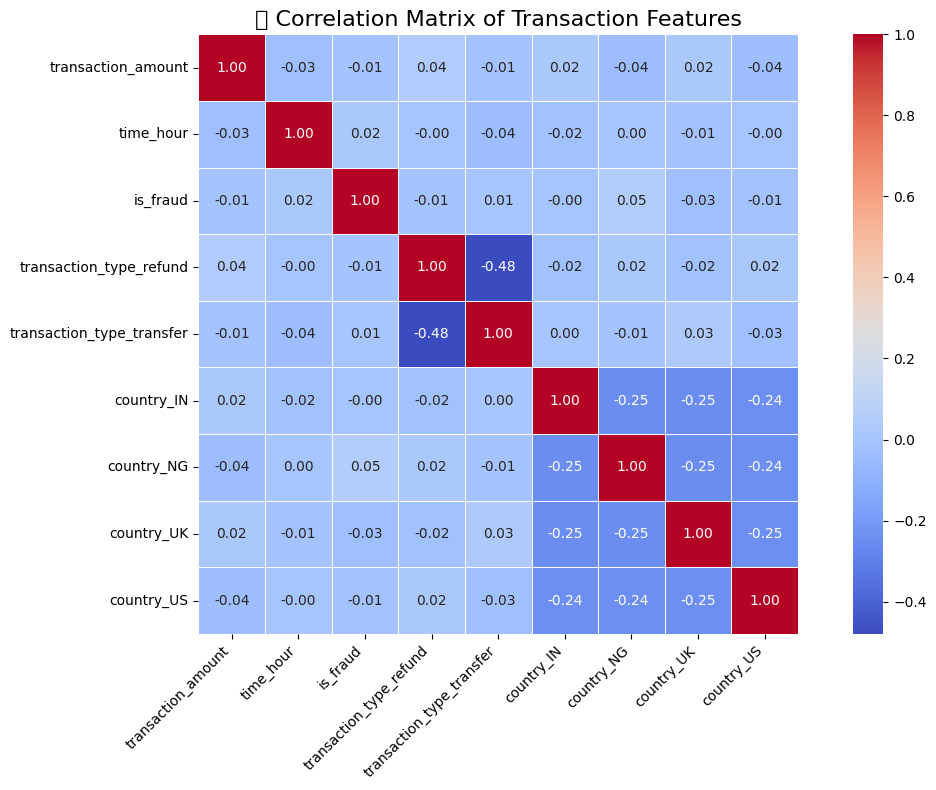

In [5]:
# 📌 5. Correlation matrix heatmap to analyze feature relevance
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("🔍 Correlation Matrix of Transaction Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


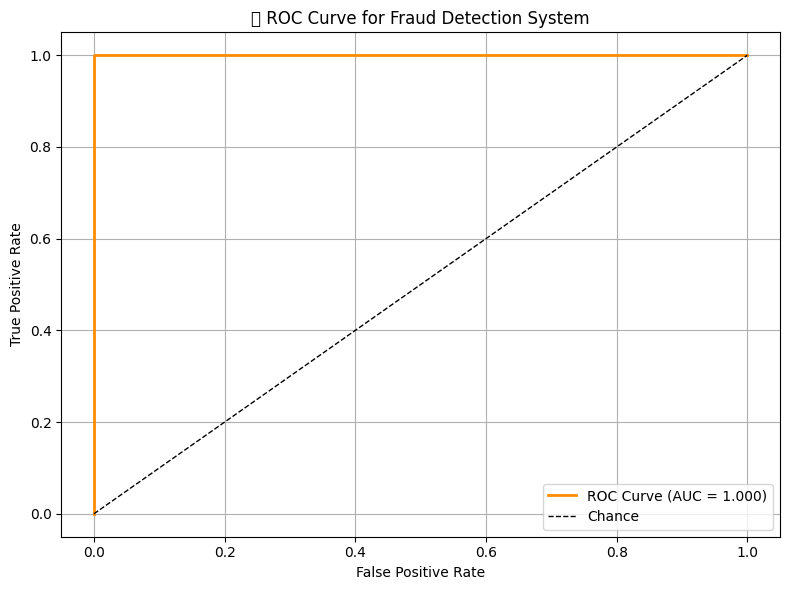

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Generate true labels
np.random.seed(42)
n_samples = 1000
fraud_ratio = 0.15
y_true = np.random.choice([0, 1], size=n_samples, p=[1 - fraud_ratio, fraud_ratio])

# 2. Simulate predicted probabilities with some overlap (intentional noise)
y_pred_prob = np.zeros(n_samples)
for i in range(n_samples):
    if y_true[i] == 1:
        # Fraudulent: mostly high scores, but with noise
        y_pred_prob[i] = np.random.normal(loc=0.85, scale=0.1)
    else:
        # Legitimate: mostly low scores, but with noise
        y_pred_prob[i] = np.random.normal(loc=0.25, scale=0.1)

# Clip to valid probability range [0, 1]
y_pred_prob = np.clip(y_pred_prob, 0, 1)

# 3. Compute ROC AUC
roc_auc = roc_auc_score(y_true, y_pred_prob)

# 4. Plot ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Chance', linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🚦 ROC Curve for Fraud Detection System")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
